In [36]:
import torch
import os


class Para:
    feature_column_start_name = 'ep_ratio_ttm' # 'VOL5'
    feature_column_end_name = 'BR' # 'AROON_DOWN'

    feature_num = 16 # 8

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    data_path = 'data/mt_space_1d_rate_20d_22-22_pre'
    model_path = 'models/model_mt_c2_s0.1_b16_lr0.001_d0.5_e60.pth'

    classification_n = 2

    month_num = len(os.listdir(data_path))

para = Para()
print(para.month_num)

1


In [37]:
import numpy as np
import torch
from my_utils.model_class import MLP
import pandas as pd

def insert_predict(df: pd.DataFrame, model_path, out_nums: int, column_name: str) -> pd.DataFrame:

    # 加载模型
    model = MLP(in_nums=para.feature_num, out_nums=out_nums, drop_p=0.5)
    model.load_state_dict(torch.load(model_path, map_location=para.device))
    model = model.to(para.device)

    # 运算
    model.eval()
    predict_tensor = model(torch.Tensor(df.loc[:, para.feature_column_start_name: para.feature_column_end_name].values).to(device=para.device))

    # 插入 predict_tensor 列
    df.insert(loc=0, column='predict_tensor_'+column_name, value=np.nan)
    # 插入 predict_return_bin 列
    df.insert(loc=0, column='predict_return_bin_'+column_name, value=np.nan)

    df['predict_tensor'+'_'+column_name] = predict_tensor.to(device='cpu').detach().numpy().tolist()
    df['predict_return_bin'+'_'+column_name] = predict_tensor.to(device='cpu').detach().numpy().argmax(1)

    return df

In [38]:
df = pd.DataFrame()

for i_csv in range(para.month_num):
    df = pd.read_csv(para.data_path +'/' + str(i_csv) + '.csv', index_col='order_book_id')

df

,board_type,sector_code,month,date,yield_rate,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,MACD_DIFF,MACD_DEA,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
order_book_id,,,,,,,,,,,,,,,,,,,,,
600519.XSHG,MainBoard,ConsumerStaples,0,2022-01-04,-1.112099,-2.335302,2.445610,-2.335302,2.921090,2.363231,...,0.712980,1.863103,0.661378,1.450246,0.947341,1.070849,-0.476504,1.020469,1.494711,2.626663
600519.XSHG,MainBoard,ConsumerStaples,1,2022-01-05,-0.016932,-1.895815,1.953327,-1.895815,2.546871,2.185792,...,0.654667,0.849837,0.060708,1.246050,0.831787,1.059580,-0.841824,1.045772,1.176461,1.971050
600519.XSHG,MainBoard,ConsumerStaples,2,2022-01-06,0.205053,-1.198018,1.197999,-1.198018,2.052478,1.969994,...,0.224509,-0.163430,-0.703168,1.214134,0.918137,1.116921,-0.586665,1.058602,1.007730,1.768864
600519.XSHG,MainBoard,ConsumerStaples,3,2022-01-07,0.415039,-0.497911,0.470874,-0.497911,1.476416,1.711310,...,-0.849724,-1.176697,-1.361430,1.097440,1.085080,1.116436,-0.103082,1.055240,1.001533,1.317006
600519.XSHG,MainBoard,ConsumerStaples,4,2022-01-10,0.357377,-0.919124,0.904763,-0.919124,1.124964,1.451868,...,-1.601866,-0.163430,-0.771570,1.061868,1.140790,1.111305,0.154034,1.058127,1.616634,1.432002
600519.XSHG,MainBoard,ConsumerStaples,5,2022-01-11,1.004905,-0.472129,0.444660,-0.472129,0.736328,1.186264,...,-1.445104,-1.176697,-1.109988,0.825540,-1.335304,1.021991,0.430409,0.946287,1.017897,0.765996
600519.XSHG,MainBoard,ConsumerStaples,6,2022-01-12,0.674842,-0.936451,0.922841,-0.936451,0.550913,0.946085,...,-1.093784,-0.163430,-0.409835,0.714547,-2.006417,0.986408,0.428394,0.852859,1.637160,1.082187
600519.XSHG,MainBoard,ConsumerStaples,7,2022-01-13,1.844880,0.689550,-0.697190,0.689550,0.017137,0.674213,...,-1.051277,-1.176697,-1.962826,1.072666,-0.538596,1.106139,0.826021,0.816882,0.903792,0.379071
600519.XSHG,MainBoard,ConsumerStaples,8,2022-01-14,2.289095,0.888178,-0.885028,0.888178,-0.435583,0.389094,...,-1.726566,-1.176697,-1.938542,1.177189,-0.209170,1.132361,1.185242,0.792926,0.245775,-0.190304


In [39]:
import torchmetrics
import time
import matplotlib.pyplot as plt
import torch.nn.functional as F

precision = torchmetrics.Precision(average='none', num_classes=para.classification_n)
accuracy = torchmetrics.Accuracy()

# 插入预测数据
df = insert_predict(df=df, model_path=para.model_path, out_nums=para.classification_n, column_name='2c')

# 综合多个预测数据
df.insert(loc=0, column='predict_return_bin', value=np.nan)
df.loc[df['predict_return_bin_2c'].isin([0,]), 'predict_return_bin'] = 0
df['predict_return_bin'].replace(to_replace=np.nan, value=1, inplace=True)
df['predict_return_bin'] = df['predict_return_bin'].astype('int64')

df.insert(loc=0, column='probability', value=np.nan)
for stock_id in range(len(df.index)):
    df.iloc[stock_id, 0] = F.softmax(torch.tensor(df.iloc[stock_id, df.columns.get_loc('predict_tensor_2c')]), dim=0).numpy()[0]

# 插入实际 return_bin 列
df.insert(loc=0, column='return_bin', value=np.nan)
df.loc[df['yield_rate'] > 0.0, 'return_bin'] = 0
df['return_bin'].replace(to_replace=np.nan, value=1, inplace=True)
df['return_bin'] = df['return_bin'].astype('int64')

# 计算精确率
df = df.sort_values(by='probability', ascending=False)

pred = torch.tensor(df['predict_return_bin']).type(torch.LongTensor)
target = torch.tensor(df['return_bin']).type(torch.LongTensor)

print(pred)
print(target)

print(precision(preds=pred, target=target))
print(accuracy(preds=pred, target=target))

print(df.loc[df['yield_rate']>0.0, 'predict_return_bin'].value_counts())
print(df['return_bin'].value_counts())

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1])
tensor([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1])
tensor([0.4615, 0.3333])
tensor(0.3871)
1    12
0     6
Name: predict_return_bin, dtype: int64
0    18
1    13
Name: return_bin, dtype: int64


In [40]:
from rqdatac import get_price
import rqdatac

rqdatac.init()
hs300_df = get_price(order_book_ids='000300.XSHG', start_date='2022-01-01', end_date='2022-03-22', fields='close')

c:\users\millet\miniconda3\envs\torch1.8-gpu\lib\site-packages\rqdatac\client.py:197: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)


<AxesSubplot:xlabel='date'>

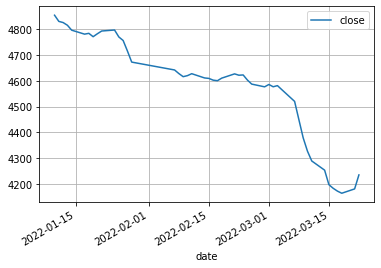

In [41]:
hs300 = hs300_df.reset_index(level='order_book_id').drop(labels='order_book_id', axis=1)
hs300.rolling(5).mean().plot(grid=True)

## 测试模型预测

In [42]:
import torch
from my_utils.model_class import MLP

model = MLP(in_nums=22, out_nums=2, drop_p=0.5)
model.load_state_dict(torch.load('models/model_c2_p[[0.0, 0.3], [0.7, 1.0]]_b32_lr0.001_d0.5_e500.pth', map_location=para.device))
model = model.to(para.device)

model.eval()
a = model(torch.Tensor([[0.5]*22]*4).to(device=para.device))
a

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_c2_p[[0.0, 0.3], [0.7, 1.0]]_b32_lr0.001_d0.5_e500.pth'